Row count:  2184
A plot which shows the H1 value for each tag


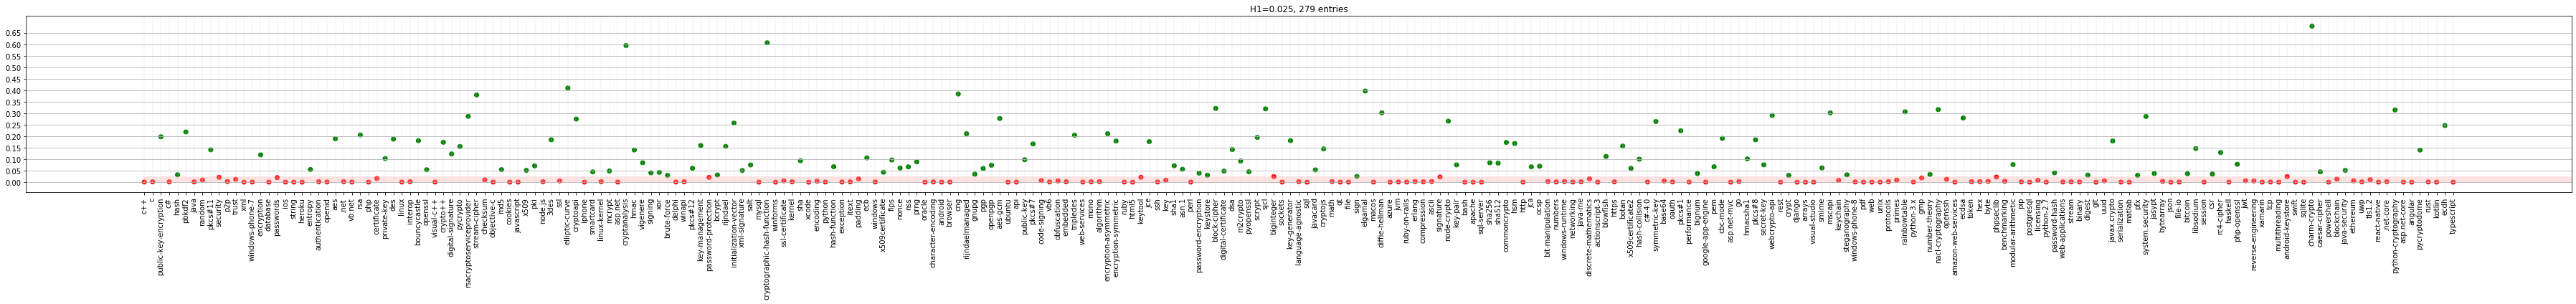

A plot which shows the H2 value for each tag


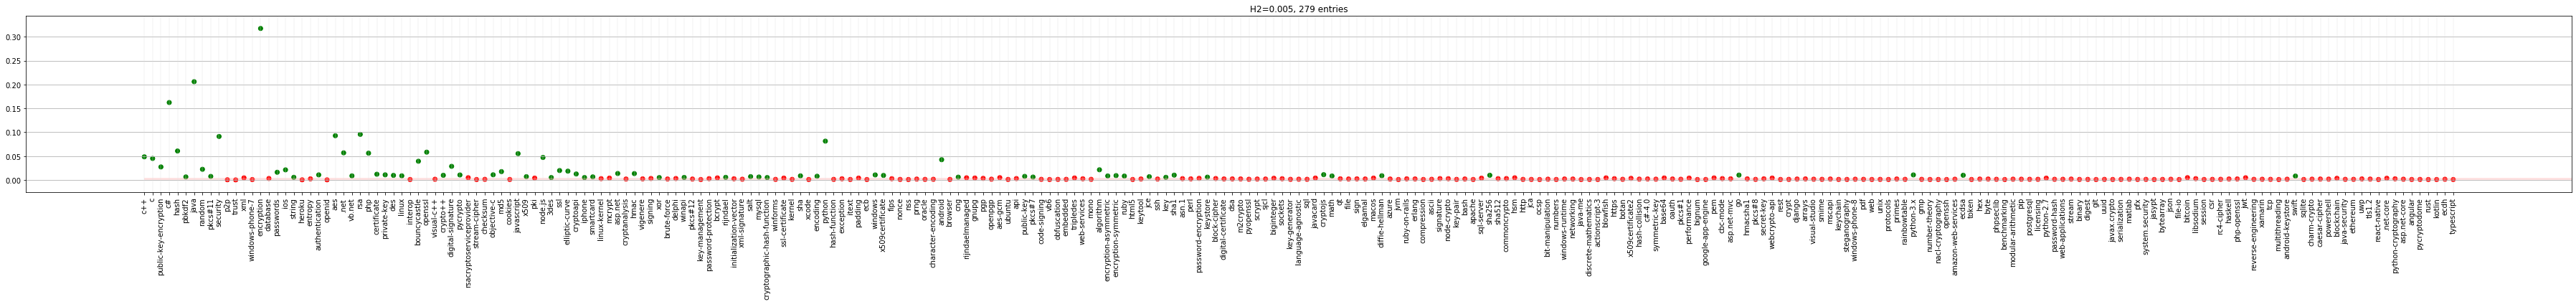

A plot which shows the H1 in x-axis and H2 in y-axis


<Figure size 432x288 with 0 Axes>

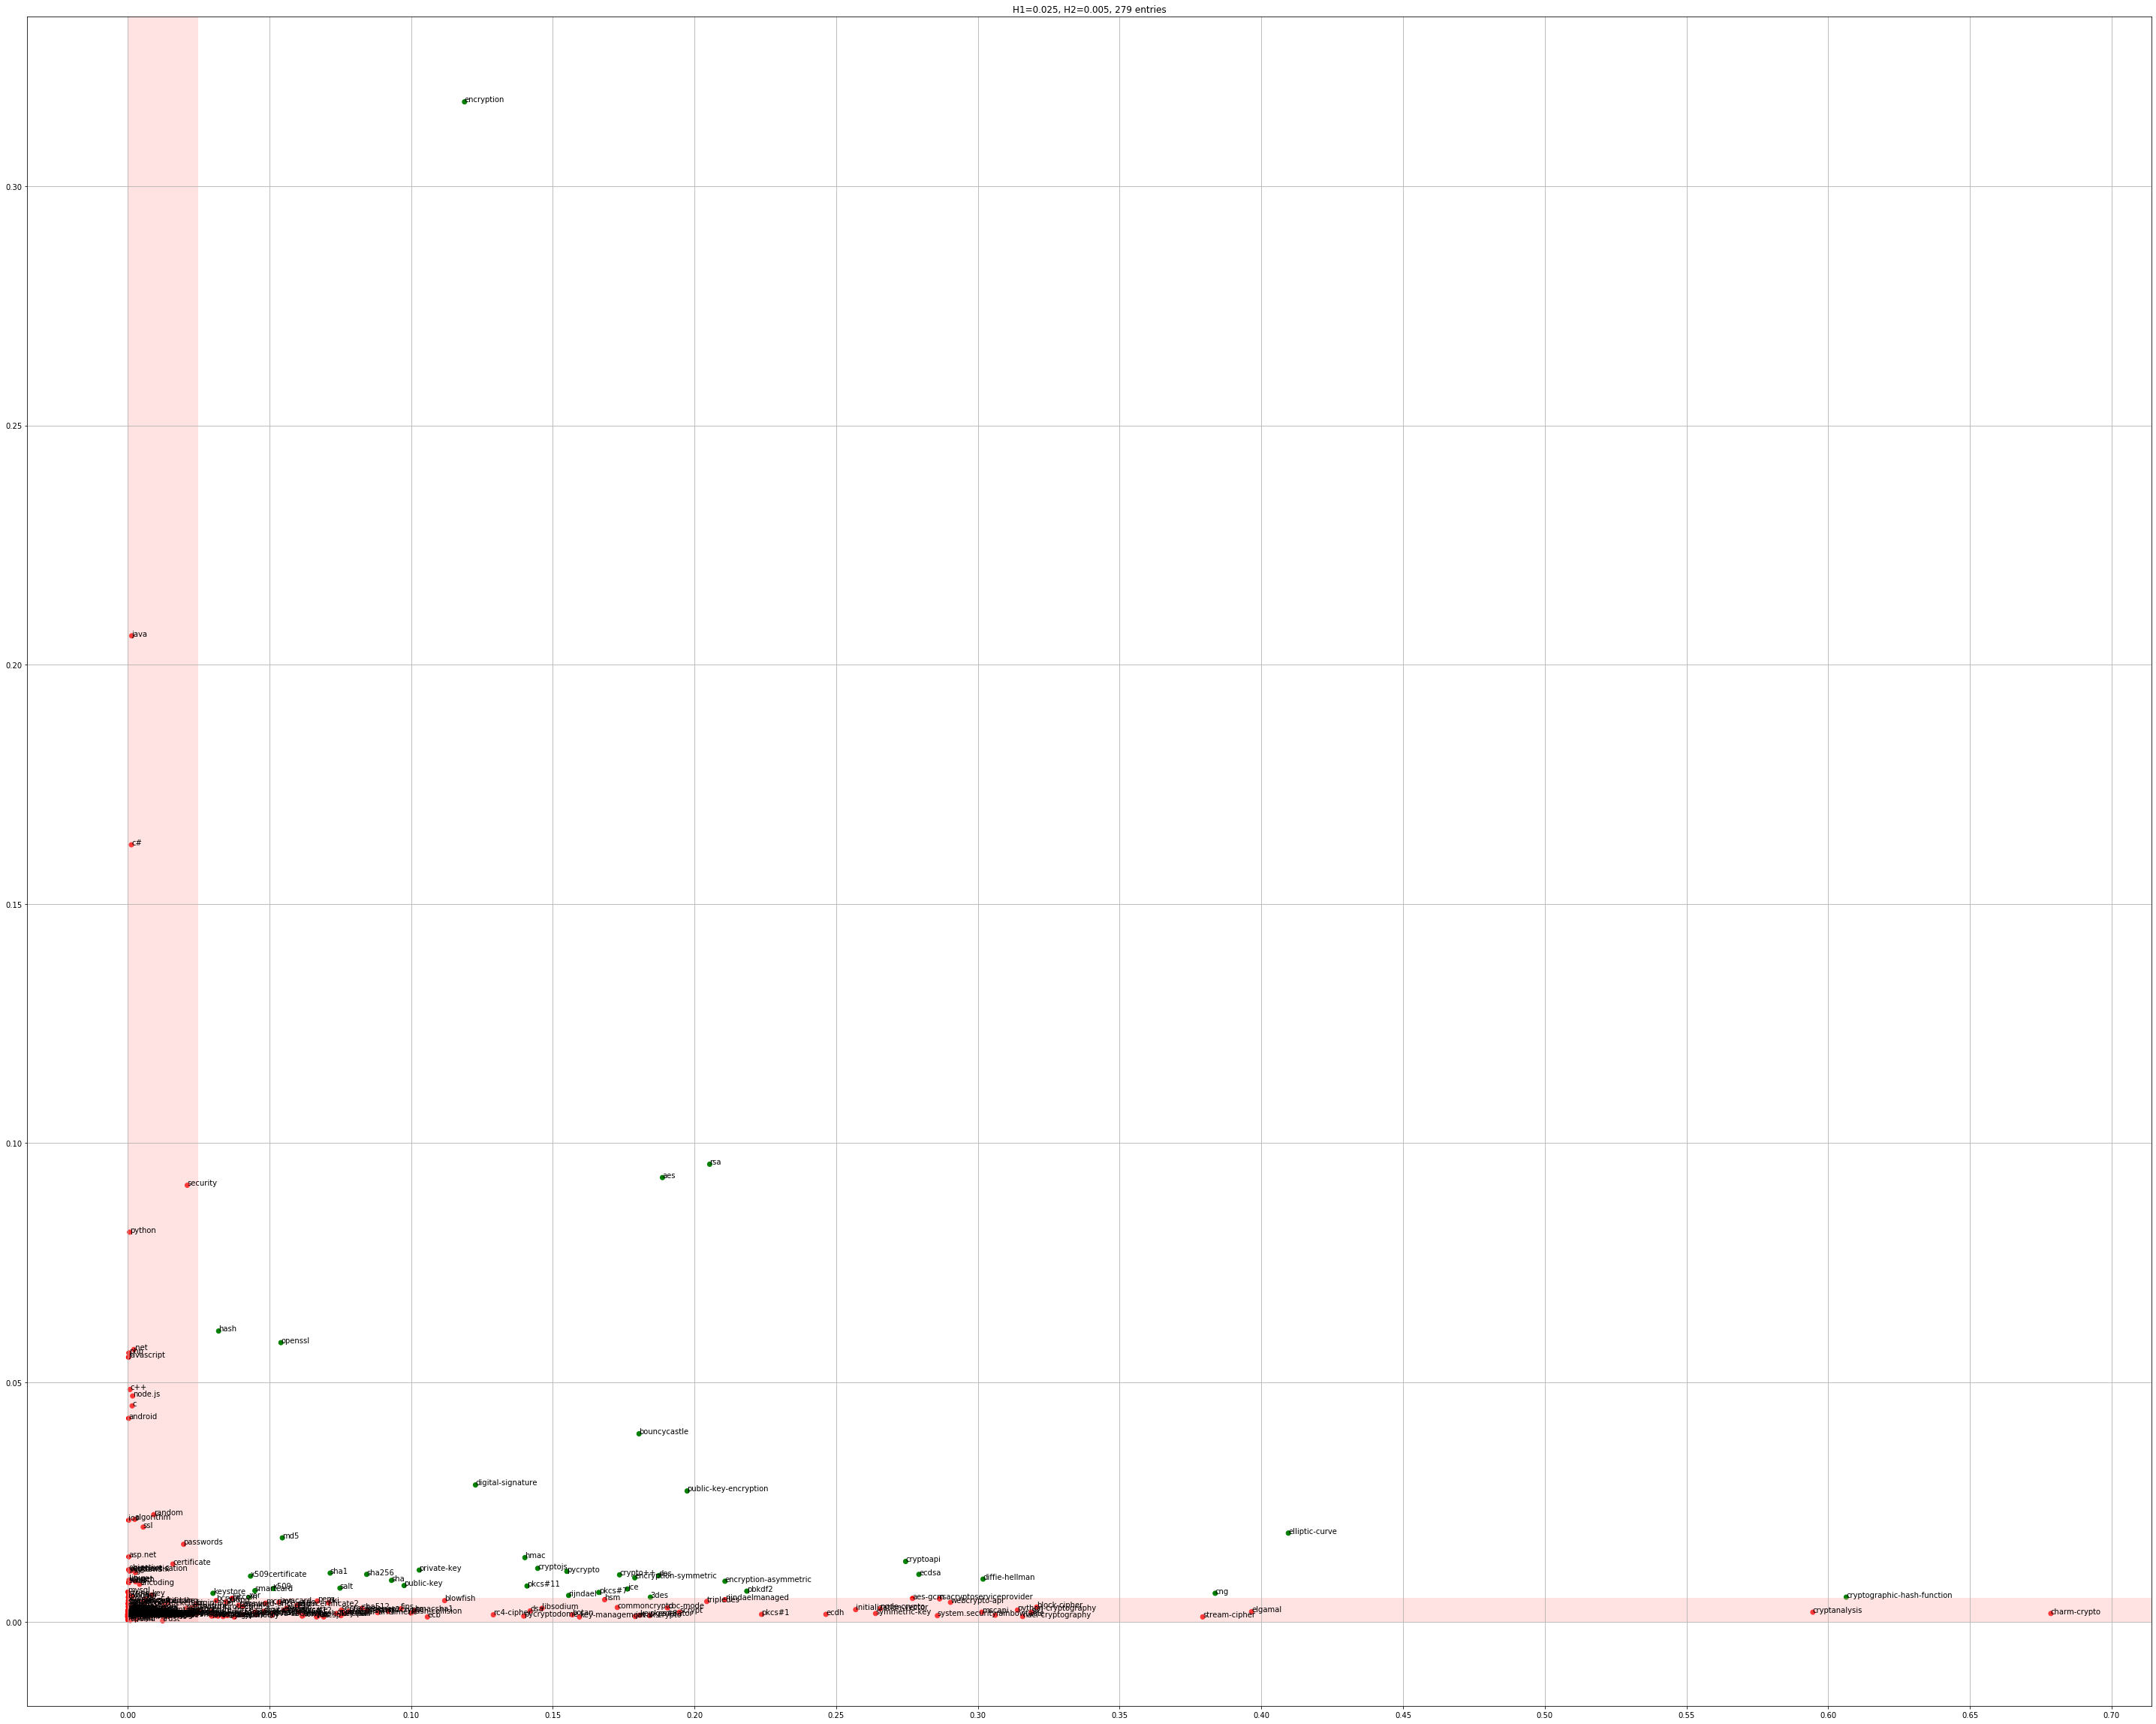

______________________________________________________________________
All tags with sufficient H1>0.025, and H2>0.005
______________________________________________________________________
public-key-encryption        H1:0.197402597, and H2:0.027313567
hash                         H1:0.032103339, and H2:0.060736748
pbkdf2                       H1:0.218461538, and H2:0.006379155
pkcs#11                      H1:0.140916808, and H2:0.007457323
encryption                   H1:0.118875475, and H2:0.317610063
aes                          H1:0.188710267, and H2:0.092812219
rsa                          H1:0.205365760, and H2:0.095597484
private-key                  H1:0.102915952, and H2:0.010781671
des                          H1:0.187390543, and H2:0.009613657
bouncycastle                 H1:0.180429397, and H2:0.039263252
openssl                      H1:0.054092349, and H2:0.058310872
crypto++                     H1:0.173566879, and H2:0.009793351
digital-signature            H1:0.12273253

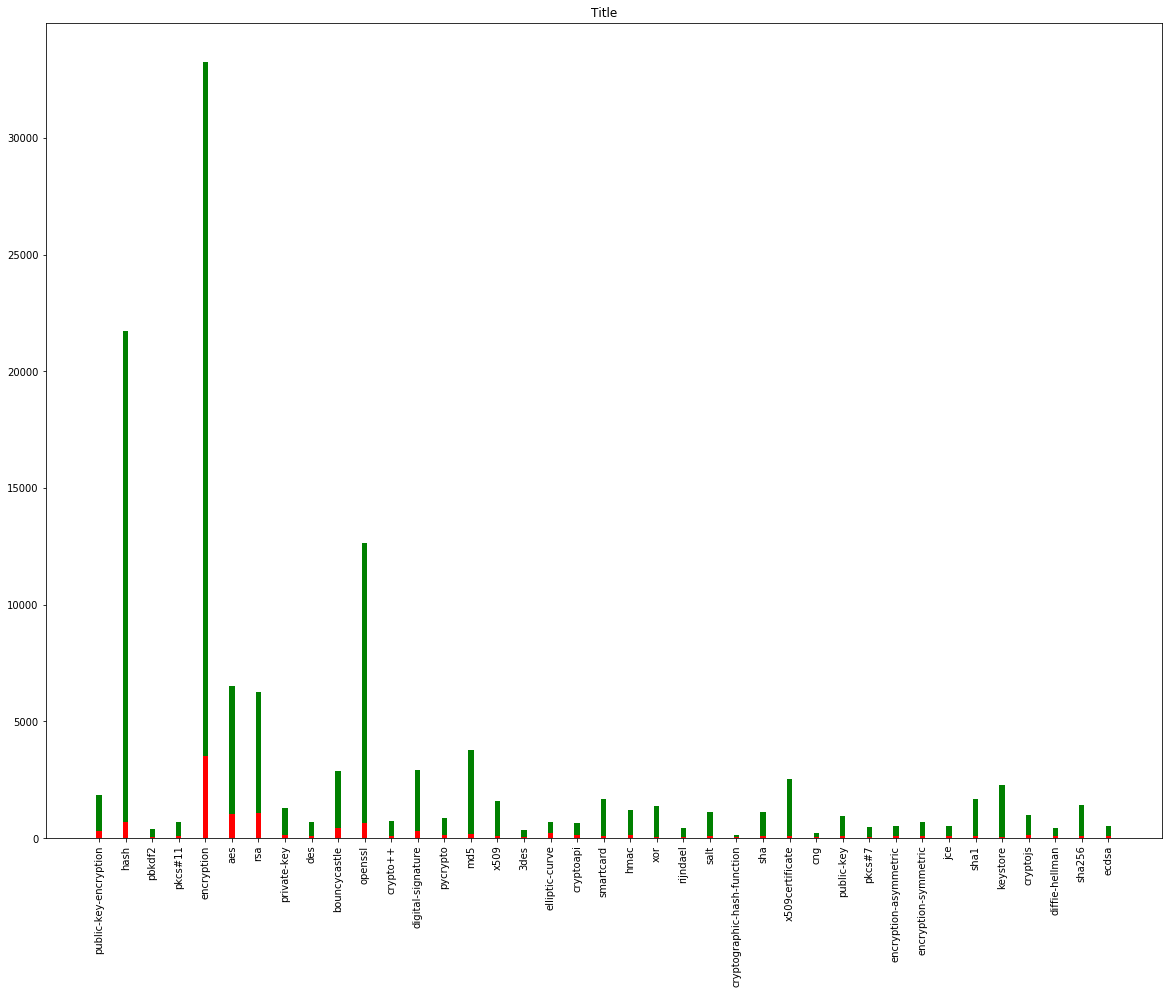

In [31]:
import mysql.connector
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="",
  database='software_composition'
)

cursor = mydb.cursor()

#Try: 0.1, 0.15, 0.2
treshholdH1s = [0.1, 0.2, 0.3]

#Try: 0.01, 0.005
treshholdH2s = [0.025, 0.05]

def database_add_rowtakeits(treshholdH1s, treshholdH2s):
    #Add tables
    '''
    for h1tresh in treshholdH1s:
        for h2tresh in treshholdH2s:
            name = "takeit" + str(h1tresh).replace('.', 'c') + "_" + str(h2tresh).replace('.', 'c');
            sql_query = "ALTER TABLE tags ADD " + name + " BOOLEAN"
            cursor.execute(sql_query);
    '''
    
    #Add booleans
    sql_select_query = "SELECT * FROM tags"
    cursor.execute(sql_select_query)
    records = cursor.fetchall();
    print("Row count: ", cursor.rowcount);
    print("**************************************************");
    for row in records:
        for h1tresh in treshholdH1:
            for h2tresh in treshholdH2:
                takeit = 1 if (row[4] > h1tresh and row[5] > h2tresh) else 0
                change_row_takeit(row[0], takeit, h1tresh, h2tresh);
        #print("ID", row[0], row[1], row[2], row[3], h1, h2)
    print("**************************************************");
    mydb.commit() #to commit all updates (Note: Alter Table didn't require commit)


def change_row_takeit(tagid, takeit, h1tresh, h2tresh):
    name = "takeit" + str(h1tresh).replace('.', 'c') + "_" + str(h2tresh).replace('.', 'c');
    sql_query = "UPDATE tags SET " + name + "='" + str(takeit) + "' WHERE id=" + str(tagid)
    cursor.execute(sql_query);
    #print(sql_query)



    
def draw_plot_counter(maxValues, withCryptoValues, names):
    print('A plot which shows the number of occurencies for each tag and which of them contains also cryptography')
    fig = plt.figure(figsize=(20, 15))
    ax = fig.add_subplot(111)
    
    x = np.array(np.arange(0, len(names), 1))
    yMax = np.array(maxValues);
    yCrypto = np.array(withCryptoValues);
    x_lbl = names
    plt.xticks(x, x_lbl)
    plt.xticks(rotation=90)
        
    #plt.scatter(x, y, c=colors)
    
    #plt.plot(x, y, 'ro')
    
    bar_width = 0.2
    
    
    
    plt.bar(x, yMax, width=bar_width, label='max', color='g', bottom=yCrypto)
    plt.bar(x, yCrypto, width=bar_width, label='withCrypto', color='r')
    
    plt.title('Title')
    #plt.savefig(name + '.png', dpi=200)
    plt.show()
    
    
def draw_plot_H1orH2(yValues, yTresh, name):
    print('A plot which shows the ' + name + ' value for each tag')
    fig = plt.figure(figsize=(50, 6))
    ax = fig.add_subplot(111)
    
    x = np.array(np.arange(0, count, 1))
    y = np.array(yValues);
    x_lbl = names
    plt.xticks(x, x_lbl)
    plt.xticks(rotation=90)
    plt.yticks(np.arange(0, y.max(), 0.05))
    for tick in x:
        plt.axvline(tick, color='#dddddd44')
        
    colors = ['g' if yv>yTresh else 'r' for yv in y]
    plt.scatter(x, y, c=colors)
    
    #plt.plot(x, y, 'ro')
    
    
    rectH1orH2_treshhold = patches.Rectangle((0, 0), plt.gca().get_xlim()[1], yTresh, linewidth=1, edgecolor='none', facecolor='#ffaaaa55')
    ax.add_patch(rectH1orH2_treshhold)
    
    plt.grid(axis='y', linestyle='-')
    plt.title(name + '=' + str(yTresh) + ', ' + str(count) + ' entries')
    plt.tight_layout()
    plt.savefig(name + '.png', dpi=200)
    plt.show()
    
    
    
def draw_plot_H1_H2(h1tresh, h2tresh):
    plt.clf()
    print('A plot which shows the H1 in x-axis and H2 in y-axis')
    fig = plt.figure(figsize=(40, 32))
    ax = fig.add_subplot(111)

    x = np.array(h1s)
    y = np.array(h2s);
    plt.xticks(np.arange(0, 1, 0.05))
    plt.yticks(np.arange(0, 1, 0.05))
    #plt.xlim([0,0.7])
    #plt.ylim([0,0.7])
    
    #for tick in x:
    #    plt.axvline(tick, color='#dddddd')
    
    colors = ['g' if xv>h1tresh and yv>h2tresh else 'r' for xv, yv in zip(x,y)]
    plt.scatter(x, y, c=colors)
            
    
    #plt.plot(x, y, 'r')
    for iiterate in range(0, count):
        ax.annotate(names[iiterate], (x[iiterate], y[iiterate]));
    
    
    rectH1_treshhold = patches.Rectangle((0, 0), h1tresh, plt.gca().get_ylim()[1], linewidth=1, edgecolor='none', facecolor='#ffaaaa55')
    ax.add_patch(rectH1_treshhold)

    rectH2_treshhold = patches.Rectangle((0, 0), plt.gca().get_xlim()[1], h2tresh, linewidth=1, edgecolor='none', facecolor='#ffaaaa55')
    ax.add_patch(rectH2_treshhold)
    
    plt.grid()
    plt.title('H1=' + str(h1tresh) + ', H2=' + str(h2tresh) + ', ' + str(count) + ' entries')
    plt.tight_layout()
    plt.savefig('H1_H2.png', dpi=200)
    plt.show()
    
    
    
def list_H1_and_H2_values(h1tresh, h2tresh):
    print("______________________________________________________________________")
    print("All tags with sufficient H1>" + str(h1tresh) + ", and H2>" + str(h2tresh))
    print("______________________________________________________________________")
    for row in recordsNew:
        if (row[4] > h1tresh and row[5] > h2tresh):
            print('%-38s%-12s' % ("\033[92m" + row[1] + "\033[0m", "H1:" + str(row[4]) + ", and H2:" + str(row[5])))
    print("______________________________________________________________________")
    print('Not inclueded are:')
    print("______________________________________________________________________")
    for row in recordsNew:
        if (row[4] < h1tresh or row[5] < h2tresh):
            h1string = str(row[4]) if (row[4] > h1tresh) else "\033[91m" + str(row[4]) + "\033[0m"
            h2string = str(row[5]) if (row[5] > h2tresh) else "\033[91m" + str(row[5]) + "\033[0m"
            print('%-38s%-12s' % ("\033[91m" + row[1] + "\033[0m", "H1:" + h1string + ", and H2:" + h2string))
    



sql_select_query = "SELECT * FROM tags"
cursor.execute(sql_select_query)
records = cursor.fetchall();
print("Row count: ", cursor.rowcount);
    
recordsNew = []
for row in records:
    if (float(row[4]) > 0.00000000001):
        recordsNew.append(row)

count = 450
if (count > len(recordsNew)):
    count = len(recordsNew)
names = [obj[1] for obj in recordsNew[0:count]]
h1s = [float(obj[4]) for obj in recordsNew[0:count]]
h2s = [float(obj[5]) for obj in recordsNew[0:count]]



plotH1 = 0.025
plotH2 = 0.005
draw_plot_H1orH2(h1s, plotH1, 'H1')
draw_plot_H1orH2(h2s, plotH2, 'H2')
draw_plot_H1_H2(plotH1, plotH2)


list_H1_and_H2_values(plotH1, plotH2)

myTags = []
for row in recordsNew:
        if (row[4] > plotH1 and row[5] > plotH2):
            myTags.append(row)

draw_plot_counter([int(obj[3]) for obj in myTags[0:count]], [int(obj[2]) for obj in myTags[0:count]], [obj[1] for obj in myTags[0:count]])
